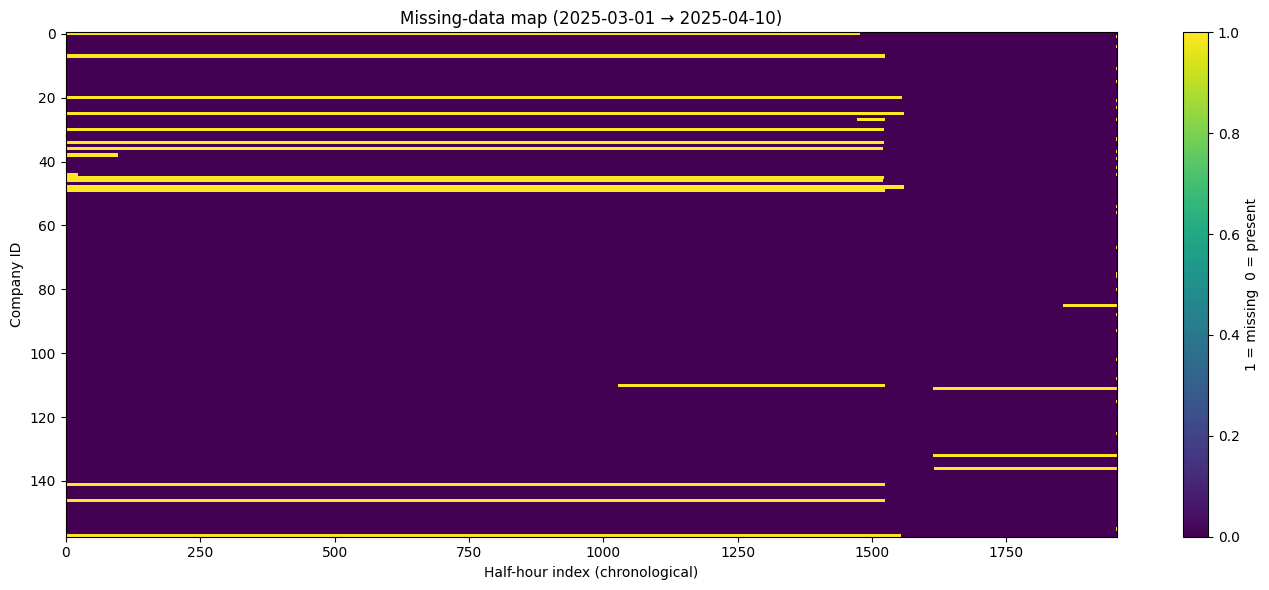

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

MERGED_FILE = r'data/all_usage_halfhour.csv'   # <-- adjust
df = pd.read_csv(MERGED_FILE, parse_dates=['time'], index_col='time')

mask = df.isna()           # True = missing
plt.figure(figsize=(14, 6))
plt.imshow(mask.T.values, aspect='auto', interpolation='none')
plt.colorbar(label='1 = missing  0 = present')
plt.xlabel('Half-hour index (chronological)')
plt.ylabel('Company ID')
plt.title('Missing-data map (2025-03-01 → 2025-04-10)')
plt.tight_layout()
plt.show()

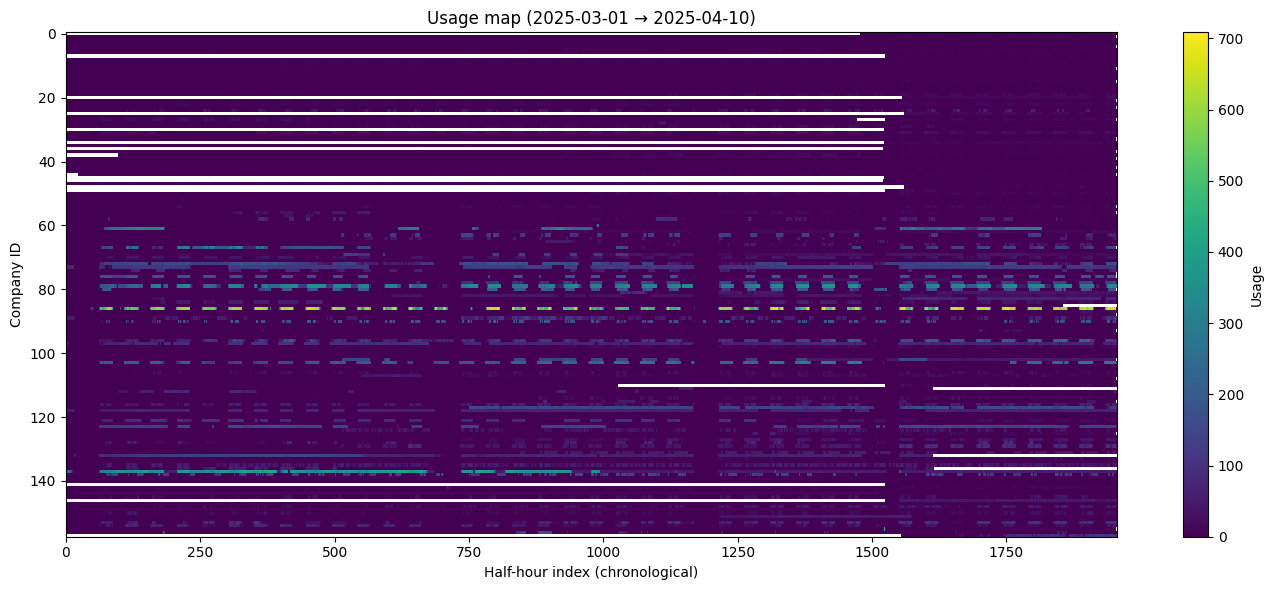

In [9]:
# show usage with heatmap
plt.figure(figsize=(14, 6))
plt.imshow(df.T.values, aspect='auto', interpolation='none')
plt.colorbar(label='Usage')
plt.xlabel('Half-hour index (chronological)')
plt.ylabel('Company ID')
plt.title('Usage map (2025-03-01 → 2025-04-10)')
plt.tight_layout()
plt.show()

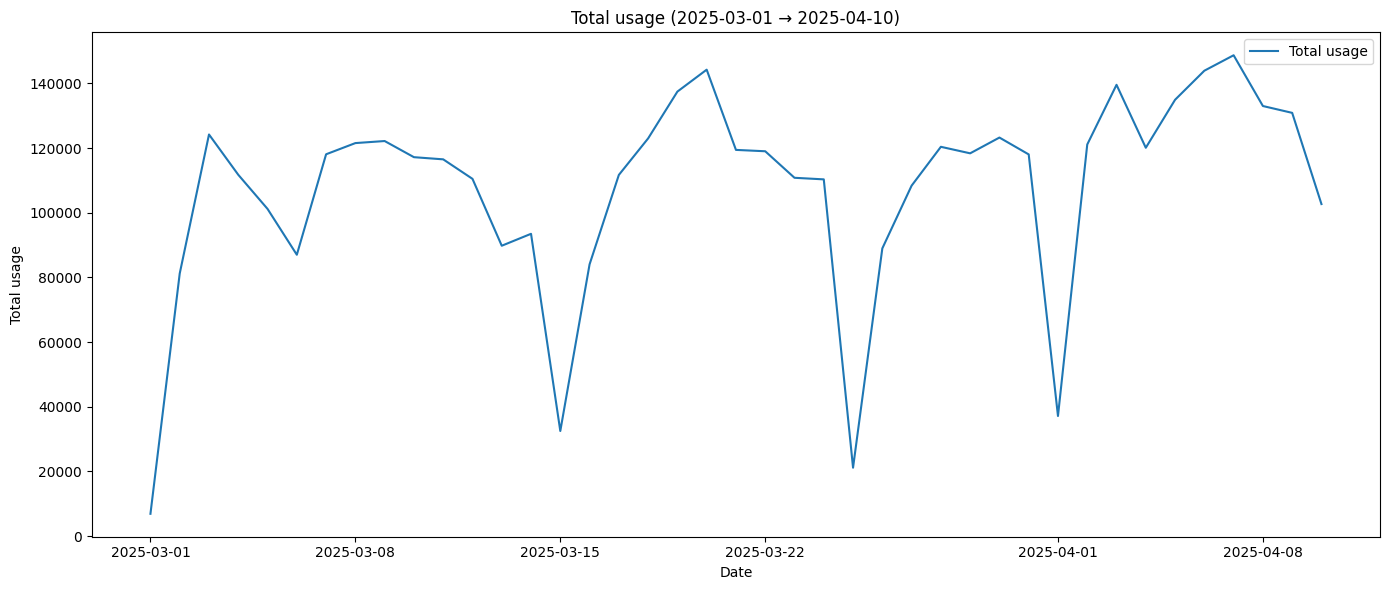

2025-03-01: 6921.237449
2025-03-02: 81212.69829200002
2025-03-03: 124183.63297900002
2025-03-04: 111724.10985800001
2025-03-05: 101171.304693
2025-03-06: 87003.33052300001
2025-03-07: 118064.52214800002
2025-03-08: 121524.362527
2025-03-09: 122158.46934699999
2025-03-10: 117167.387923
2025-03-11: 116499.10486000002
2025-03-12: 110468.52953999999
2025-03-13: 89790.05357500001
2025-03-14: 93477.711835
2025-03-15: 32520.383724
2025-03-16: 84039.53827799999
2025-03-17: 111680.95723100001
2025-03-18: 122968.74102100002
2025-03-19: 137441.859543
2025-03-20: 144221.955603
2025-03-21: 119418.936992
2025-03-22: 118997.722628
2025-03-23: 110795.542398
2025-03-24: 110307.896037
2025-03-25: 21171.240994
2025-03-26: 88968.16989599999
2025-03-27: 108360.50578400001
2025-03-28: 120374.22981499998
2025-03-29: 118359.08870599998
2025-03-30: 123233.368091
2025-03-31: 118024.55509
2025-04-01: 37154.384317000004
2025-04-02: 121090.47448
2025-04-03: 139539.660192
2025-04-04: 120078.33257
2025-04-05: 134914

In [10]:
df_total = df.sum(axis=1)  # sum usage for all companies
df_total.resample('D').sum()

# line plot of total usage
plt.figure(figsize=(14, 6))
plt.plot(df_total.resample('D').sum(), label='Total usage')
plt.xlabel('Date')
plt.ylabel('Total usage')
plt.title('Total usage (2025-03-01 → 2025-04-10)')
plt.legend()
plt.tight_layout()
plt.show()


# print numbers for each day
for date, group in df.groupby(df.index.date):
    print(f'{date}: {group.sum().sum()}')

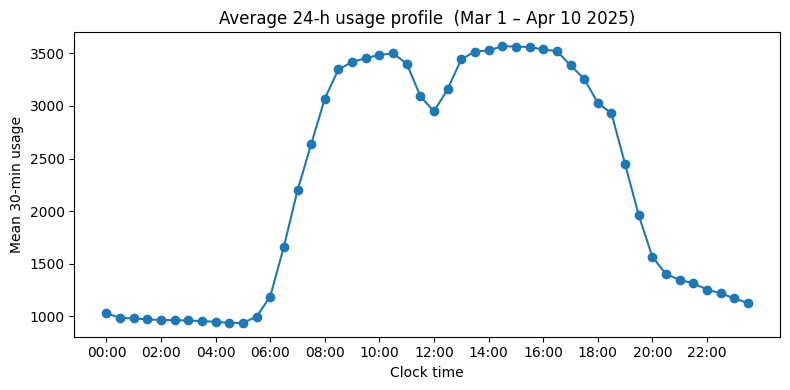

In [11]:
total = df.sum(axis=1)                     # system-wide usage
slot = total.index.hour*2 + total.index.minute//30   # 0 … 47

diurnal_mean = total.groupby(slot).mean()  # mean usage for each half-hour slot

plt.figure(figsize=(8,4))
plt.plot(diurnal_mean.values, marker='o')
plt.xticks(range(0,48,4), [f'{h:02d}:00' for h in range(0,24,2)])
plt.xlabel('Clock time')
plt.ylabel('Mean 30-min usage')
plt.title('Average 24-h usage profile  (Mar 1 – Apr 10 2025)')
plt.tight_layout()
plt.show()

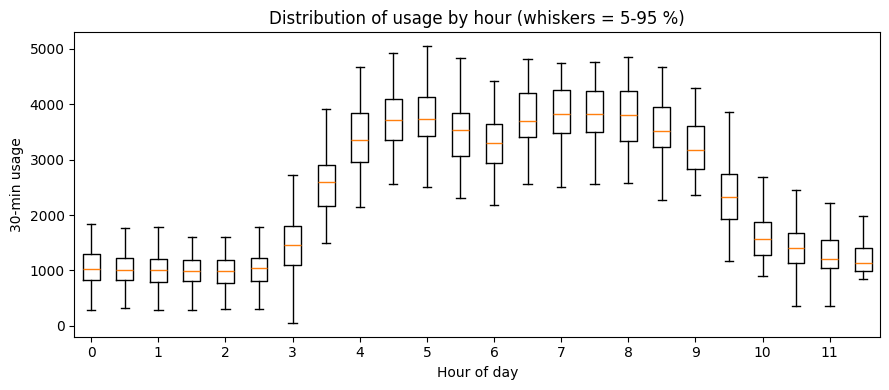

In [ ]:
data_hourly = [total[ total.index.hour == h ] for h in range(24)]

plt.figure(figsize=(9,4))
plt.boxplot(data_hourly, positions=range(24), showfliers=False)
plt.xticks(range(0,24,2))
# plt.xlabel('Hour of day')
# plt.ylabel('30-min usage')
# plt.title('Distribution of usage by hour (whiskers = 5-95 %)')
plt.xlabel('小时')                    # “Hour of day”
plt.ylabel('30分钟用量')             # “30-min usage”
plt.title('按小时的用量分布（须表示5%–95%）')  # “Distribution of usage by hour (whiskers = 5-95%)”

plt.tight_layout()
plt.show()


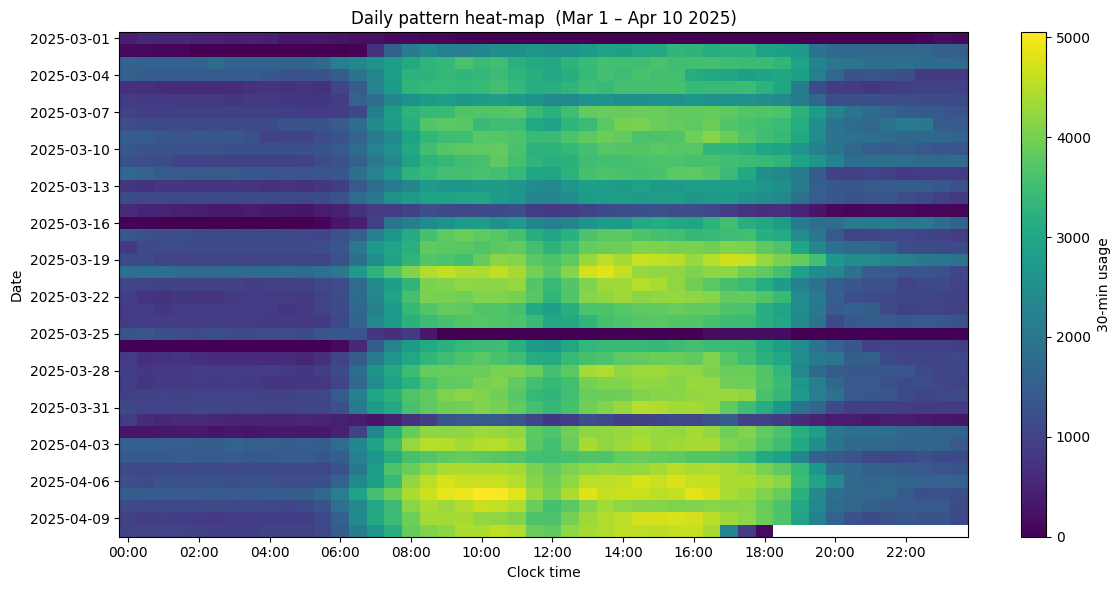

In [13]:
heat = total.copy()
heat_df = pd.DataFrame({
    'date' : heat.index.date,
    'slot' : heat.index.hour*2 + heat.index.minute//30,
    'val'  : heat.values
})
pivot = heat_df.pivot(index='date', columns='slot', values='val')

plt.figure(figsize=(12,6))
plt.imshow(pivot.values, aspect='auto', interpolation='none')
plt.colorbar(label='30-min usage')
plt.yticks(range(0, len(pivot.index), 3), pivot.index[::3])
plt.xticks(range(0,48,4), [f'{h:02d}:00' for h in range(0,24,2)])
plt.xlabel('Clock time')
plt.ylabel('Date')
plt.title('Daily pattern heat-map  (Mar 1 – Apr 10 2025)')
plt.tight_layout()
plt.show()


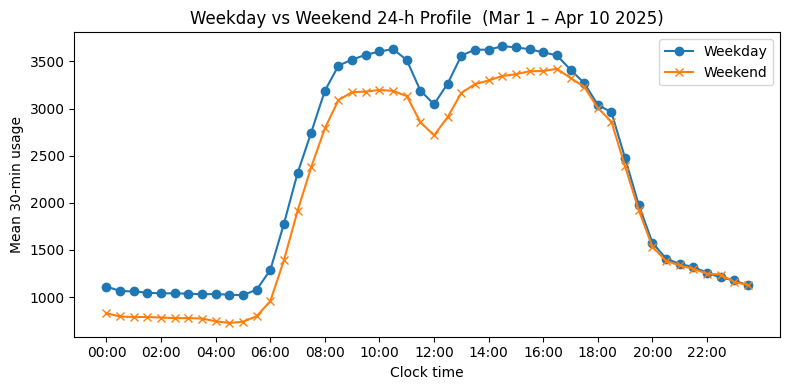

In [16]:

def slot_idx(idx: pd.DatetimeIndex) -> pd.Index:
    return idx.hour * 2 + idx.minute // 30

# ---------- weekday & weekend mean curves ----------
weekday_series = total[ total.index.weekday < 5 ]
weekend_series = total[ total.index.weekday >= 5 ]

weekday_mean = weekday_series.groupby(slot_idx(weekday_series.index)).mean()
weekend_mean = weekend_series.groupby(slot_idx(weekend_series.index)).mean()

# ---------- plot ----------
plt.figure(figsize=(8,4))
plt.plot(weekday_mean.values, label='Weekday', marker='o')
plt.plot(weekend_mean.values, label='Weekend', marker='x')
plt.xticks(range(0,48,4), [f'{h:02d}:00' for h in range(0,24,2)])
plt.xlabel('Clock time')
plt.ylabel('Mean 30-min usage')
plt.title('Weekday vs Weekend 24-h Profile  (Mar 1 – Apr 10 2025)')
plt.legend()
plt.tight_layout()
plt.show()
